# Работа с моделями линейной регресии. Основы

In [1]:
# Подключение библиотек
from math import ceil, floor
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot as plt
%matplotlib inline

## Первое знакомство с линейной регрессией

**Обозначения**:

$x \; - \; \; $ объект, для которого требуется сделать предсказание;

$y \; - \; \; $ правильный ответ на объекте $x$;

$X = (x_i, y_i)_{i=1}^l \; - \; \; $ обучающая выборка;

$\bar x = (x^1, x^2, ... , x^d) \; - \; \; $ признаковое описание объекта $x$;

$a(x) \; - \; \; $ модель (алгоритм обучения);

$Q(a, X) \; - \; \; $ функционал ошибки алгоритма $a$ на обучающей выборке $X$.

**Модель линейной регрессии**:
$$a(x) = w_0 + w_1 \cdot x^1 + w_2 \cdot x^2 + ... + w_d \cdot x^d \;, $$
где

$w_0 \; - \; \; $ свободный коэффициент (сдвиг, bias);

$w_j, \; \; j = 1, 2, ... , d \; \; - $ коэффициенты (**веса**) признаков.


***Обучение модели*** - задача минимизации $Q(\bar w, X)$:  $$Q(\bar w, X) \; \to \; \min\limits_{\bar w} \; \quad \quad (*)$$
т. е. нахождение таких коэффициентов $w_0, w_1, w_2, ... , w_d ,$ при которых функционал ошибки $Q(\bar w, X)$ имеет наименьшее значение.

Для получения однородной модели вводят фиктивный константный признак $x^0$, который на каждом объекте принимает значение, равное 1.

Тогда модель линейной регрессии может быть записана в более компактной форме:
$$a(x) = \sum_{j=0}^{d}{w_j \cdot x^j} = \langle \bar w, \bar x \rangle \;, $$
где $\langle \bar w, \bar x \rangle \; \; - $ скалярное произведение вектора весов $\bar w = (w_0, w_1, w_2, ... , w_d) \;$ и вектора $\bar x = (x^0, x^1, x^2, ... , x^d), \; \; x^0 = 1$ для всех объектов.

Такой подход позволяет выполнять все вычисления в матричной форме, что (с учетом возможности распараллеливания) на больших наборах данных является намного более эффективным.

**Измерение ошибки**

В качестве меры ошибки модели регрессии на одном объекте $x$ чаще всего используется квадрат отклонения $(a(x) - y)^2$;

в качестве функционала ошибки $Q(a, X)$ - квадрат отклонения на одном объекте, усредненный по всей выборке.

В этом случае для линейной модели
$$Q(\bar w, X) = \frac 1 l \sum_{i=1}^l(⟨ \bar w, \bar x_i ⟩ - y_i)^2 \;. $$

Такой способ измерения ошибки называется ***среднеквадратической ошибкой*** (Mean Squared Error, ***MSE***).

При использовании **MSE** задача (*) имеет аналитическое решение: оптимальный вектор весов может быть найден по формуле
$$\bar w_* = (X^T \cdot X)^{-1} \cdot X^T \cdot \bar y \;. $$

Проиллюстрируем построение линейной модели на учебном примере с одним входным признаком $x$ и прогнозируемым признаком $y. \;$ В этом случае модель линейной регрессии имеет вид $ \; a(x) = w_0 + w_1 \cdot x \;.$

Создадим обучающую выборку: матрицу $X$ из одного столбца (значения признака $x$) и столбец правильных ответов $y$.

In [2]:
# Создание массива X и преобразование его к размерности (l, 1)
X = np.array([1.5, 2, 3, 4.5, 7, 8]).reshape(-1, 1)

In [3]:
# Создание массива y и преобразование его к размерности (l, 1)
y = np.array([5, 4.5, 8.5, 14, 16, 20]).reshape(-1, 1)

Text(0.5, 1.0, 'Модельная обучающая выборка')

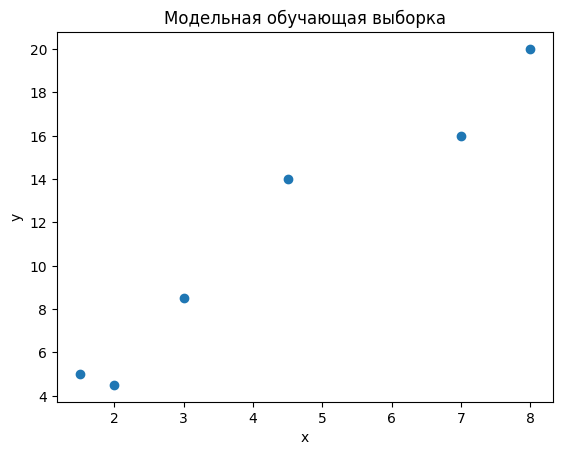

In [4]:
# Визуализация выборки
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Модельная обучающая выборка')

По визуальному представлению можно предположить существование линейной зависимости между признаками.

Найдем оптимальные значения весов аналитическим методом.

In [5]:
# Создание единичного столбца - значений фиктивного признака
Ones = np.ones(X.shape[0]).reshape(-1, 1)

# Присоединение единичного столбца к X
X_1 = np.hstack((Ones, X))

In [6]:
X_1

array([[1. , 1.5],
       [1. , 2. ],
       [1. , 3. ],
       [1. , 4.5],
       [1. , 7. ],
       [1. , 8. ]])

In [7]:
# Определение оптимальных весов аналитическим методом
w = np.dot(np.dot(np.linalg.inv(np.dot(X_1.T, X_1)), X_1.T), y)
w

array([[1.37674419],
       [2.29767442]])

Получена модель регрессии (коэффициенты округлены до 3 знаков после запятой):

$a(x) = 1.377 + 2.298 \cdot x \;.$

На практике требования к точности представления результатов определяются условиями конкретной задачи.

Можно получить предсказание модели на любом объекте выборки, а также на новом объекте (которого не было в обучающей выборке).

In [8]:
# Прогноз модели на объекте с номером i
i = 2
a_i = w[0]+w[1]*X[i,0]
print("Прогноз модели на объекте " + str(X[i,0]) +" равен", a_i[0])

# или (в матричной форме, с использованием фиктивного признака)
a_i_ = np.dot(X_1[i], w)
print("Прогноз модели на объекте " + str(X[i,0]) +" равен", a_i_[0])

# Прогноз модели на новом объекте
x_new = 6
a_x = w[0]+w[1]*x_new
print("Прогноз модели на новом объекте " + str(x_new) +" равен", a_x[0])

Прогноз модели на объекте 3.0 равен 8.269767441860473
Прогноз модели на объекте 3.0 равен 8.269767441860473
Прогноз модели на новом объекте 6 равен 15.162790697674428


Можно рассчитать ошибку модели на любом объекте выборки, а также среднеквадратичную ошибку по всей выборке.

In [9]:
# Ошибка модели на объекте с номером i

i = 2
err = (w[0]+w[1]*X[i,0] - y[i,0])**2
print("Ошибка на объекте " + str(X[i,0]) +" равна", err[0])

i = 4
err = (w[0]+w[1]*X[i,0] - y[i,0])**2
print("Ошибка на объекте " + str(X[i,0]) +" равна", err[0])

# или (в матричной форме, с использованием фиктивного признака)
err_ = np.square(np.dot(X_1[i], w) - y[i])
print("Ошибка на объекте " + str(X[i,0]) +" равна", err_[0])

Ошибка на объекте 3.0 равна 0.05300703082747049
Ошибка на объекте 7.0 равна 2.1329583558680714
Ошибка на объекте 7.0 равна 2.1329583558680714


In [10]:
# Среднеквадратичная ошибка по всей выборке
Q = np.square(np.dot(X_1, w) - y).mean()
print("Q = ", Q)

Q =  1.6096899224806218


Можно выполнить визуализацию полученной зависимости

In [11]:
# Определение значений аргумента x
x_lin = np.linspace(0, 9, 10)

# Определение прогнозов на основе полученного уравнения регрессии
y_lin = w[0] + w[1]*x_lin

Text(0.5, 1.0, 'Построение линейной регрессии')

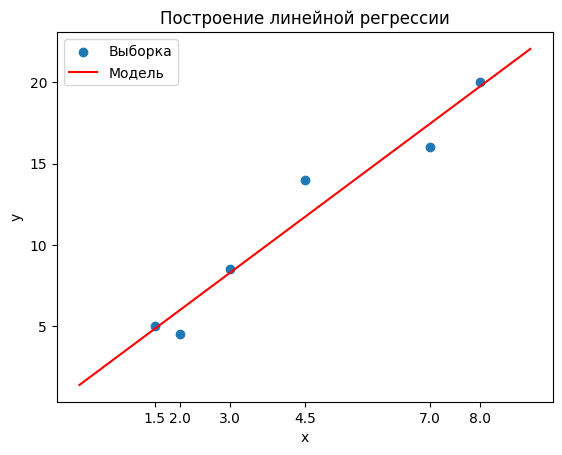

In [12]:
# Визуализация
plt.scatter(X, y, label='Выборка')
plt.plot(x_lin, y_lin, 'r', label='Модель')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(X.reshape(X.shape[0],))
plt.legend(loc=2)
plt.title('Построение линейной регрессии')

По графику видно, что ошибка модели на объекте $x_2 = 7$ действительно заметно превосходит ошибку на объекте $x_1 = 3$, как показали вычисления выше.

На реальных данных аналитический метод решения задачи (*) практически неприменим. Причины:
*  входные признаки могут быть зависимы, вследствие чего не гарантируется существование обратной матрицы;
*  даже в случае ее существования обращение матрицы большой размерности может потребовать слишком много ресурсов.

Поэтому на практике применяются итерационные методы: от некоторой начальной точки строится последовательность, приближающаяся к точке минимума функционала ошибки.

Проиллюстрируем это на рассматриваемом учебном примере. Будем использовать функцию **minimize()** из модуля **optimize** библиотеки Scipy (знакомство с этой функцией должно было состояться при выполнении первой лабораторной работы).

In [13]:
# Определение минимизируемой функции
def Qw(w):
  return np.square(np.dot(X_1, np.array(w).reshape(-1, 1)) - y).mean()

In [14]:
# Поиск минимума из начальной точки (0, 0)
w_min = opt.minimize(Qw, [0, 0])
print(w_min)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.6096899224806218
        x: [ 1.377e+00  2.298e+00]
      nit: 5
      jac: [ 5.960e-08  3.129e-07]
 hess_inv: [[ 2.072e+00 -3.628e-01]
            [-3.628e-01  8.369e-02]]
     nfev: 18
     njev: 6


Видим, что алгоритм за 5 итераций нашел ту же точку минимума, которая была получена ранее аналитическим методом.

В реальных задачах построения моделей прогнозирования таких простых приемов, как правило, оказывается недостаточно.

Разработан обширный инструментарий, применение которого позволяет преодолевать проблемы, возникающие из-за возможных взаимосвязей входных признаков, снижать негативное влияние выбросов и т. д.

## Работа с моделями линейной регрессии в библиотеке **Scikit-learn**

Библиотека **Scikit-learn (sklearn)** содержит инструментарий для создания, обучения и оценки качества моделей машинного обучения, а также множество дополнительных функций, необходимых для получения качественных моделей.

Включает реализации большинства алгоритмов машинного обучения, известных на текущий момент.

[Общее описание библиотеки](https://scikit-learn.org/stable/index.html)

[Руководство пользователя (описание реализованных моделей и алгоритмов)](https://scikit-learn.org/stable/user_guide.html)

[Документация основного инструментария](https://scikit-learn.org/stable/modules/classes.html)

### Генерация наборов данных. Модуль **datasets**
Для изучения возможностей алгоритмов машинного обучения и понимания, каким образом работают многочисленные настройки этих алгоритмов, обычно используют модельные наборы данных. Это позволяет анализировать работу алгоритмов, не отвлекаясь на дополнительные проблемы, связанные с особенностями конкретных наборов данных в реальных задачах.

Модуль **datasets** библиотеки Scikit-learn содержит
*  встроенные наборы данных для создания моделей разных типов (получены на основе реальных данных, но предварительно подготовлены для учебных целей);
*  генераторы для формирования модельных наборов с использованием псевдослучайных чисел.

[Документация модуля](https://scikit-learn.org/stable/api/sklearn.datasets.html)

[Описание встроенных наборов данных и генераторов](https://scikit-learn.org/stable/datasets.html#datasets)

Подключение встроенного генератора имеет вид

> **from sklearn.datasets import <имя генератора>**



**Генерация набора данных для линейной регрессии**

Метод **make_regression()** из модуля **datasets** генерирует набор данных, представляющий собой случайную линейную комбинацию случайных признаков с шумом:
 > для заданного количества признаков генерирует коэффициенты уравнения регрессии и добавляет шум - значения целевого признака рассеиваются относительно прогноза линейной модели.

Возвращает сформированные
-  значения признаков (входных и целевого);
-  коэффициенты уравнения регрессии, использованные для расчета значений целевого признака (при установке параметра **coef=True**).

В числе параметров метода (помимо *coef*):
-  количество объектов в выборке,
-  общее количество входных признаков,
-  число информативных признаков (из общего количества),
-  количество целевых переменных (по умолчанию 1),
-  стандартное отклонение для нормального закона, определяющего шум,
-  номер генератора случайных чисел (задается, если требуется воспроизводимость результатов),
-  др.

[Документация метода](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

Возможность создания неинформативных признаков при генерации набора позволяет имитировать ситуацию, когда в анализируемых данных присутствуют незначимые ("шумовые") или малозначимые признаки.

Сгенерируем набор данных из 100 объектов, которые характеризуются одним информативным (значимым) признаком и одним неинформативным ("шумовым").

Для изучения особенностей работы алгоритмов при разных настройках рекомендуется фиксировать номер генератора случайных чисел, чтобы алгоритмы с разными настройками получали на вход один и тот же набор данных.

In [15]:
from sklearn.datasets import make_regression

In [16]:
# Без возвращения сгенерированных весов (по умолчанию coef=False)
X, y = make_regression(n_samples=100, n_features=2, n_informative=1, noise=10, random_state=42)

In [17]:
# Вывод первых 10 значений входных признаков
X[:10]

array([[-1.41537074, -0.42064532],
       [ 0.52194157,  0.29698467],
       [-0.88951443, -0.81581028],
       [-0.88385744,  0.15372511],
       [ 0.73846658,  0.17136828],
       [-0.26465683,  2.72016917],
       [ 1.14282281,  0.75193303],
       [ 0.36139561,  1.53803657],
       [ 0.81252582,  1.35624003],
       [-0.22346279,  0.71400049]])

In [18]:
# Вывод первых 10 значений целевого признака
y[:10]

array([-120.40785493,   52.26537445,  -75.96761815,  -95.42398751,
         64.39470776,  -26.77516429,   90.94227978,   39.99553703,
         95.17918726,  -15.98588392])

Сгенерированные коэффициенты уравнения регрессии (веса признаков) недоступны.

Для получения этих коэффициентов надо задать *coef=True* и указать имя соответствующего объекта.

In [19]:
# С возвращением сгенерированных весов
X, y, coef = make_regression(n_samples=100, n_features=2, n_informative=1, noise=10, coef=True, random_state=42)

In [20]:
X[:10]

array([[-1.41537074, -0.42064532],
       [ 0.52194157,  0.29698467],
       [-0.88951443, -0.81581028],
       [-0.88385744,  0.15372511],
       [ 0.73846658,  0.17136828],
       [-0.26465683,  2.72016917],
       [ 1.14282281,  0.75193303],
       [ 0.36139561,  1.53803657],
       [ 0.81252582,  1.35624003],
       [-0.22346279,  0.71400049]])

In [21]:
y[:10]

array([-120.40785493,   52.26537445,  -75.96761815,  -95.42398751,
         64.39470776,  -26.77516429,   90.94227978,   39.99553703,
         95.17918726,  -15.98588392])

Благодаря заданию *random_state* получены те же значения признаков.

Можно вывести сгенерированные коэффициенты уравнения регрессии.

In [22]:
coef

array([87.73730719,  0.        ])

Сгенерированное уравнение регрессии имеет вид $\quad a(x) = 87.737 \cdot x^1 + 0 \cdot x^2 \;.$

Неинформативный признак получает нулевой коэффициент.

*Замечание.* Какие именно признаки (из общего числа) будут "назначены" информативными, а какие нет, определяется случайным образом. При тех же настройках, но с другим значением *random_state* информативным может оказаться второй признак, а не первый. Упражнение: проверить это самостоятельно.

Выполним визуализацию полученной выборки в осях координат
*  информативный признак - целевой признак,
*  неинформативный признак - целевой признак.

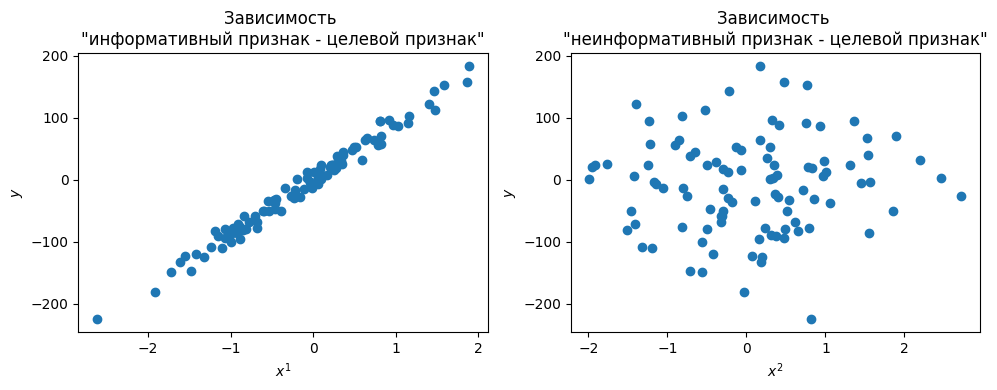

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
i = 0
for ax in axes:
    ax.scatter(X[:, i], y)
    ax.set_xlabel('$x^%s$' % (i+1))
    ax.set_ylabel('$y$')
    i += 1
axes[0].set_title('Зависимость \n"информативный признак - целевой признак"')
axes[1].set_title('Зависимость \n"неинформативный признак - целевой признак"')
fig.tight_layout()

### Разделение выборки на обучающий и тестовый набор данных
Для получения правильного представления о качестве прогнозов, получаемых с помощью модели машинного обучения, необходимо оценивать качество прогнозов не только на тех данных, на которых модель обучалась, но и на "новых" данных (новых для модели), которые не участвовали в процессе обучения.

Поэтому в практике создания моделей машинного обучения весь имеющийся набор данных (dataset) разбивается на 2 части:
*  обучающие данные (*train data*, обучающая выборка),
*  тестовые данные (*test data*, тестовая (или "отложенная") выборка).

В построении модели участвуют только обучающие данные (тестовая выборка "отложена в сторону").

Окончательная оценка качества прогнозов обученной модели выполняется на тестовых данных.

*Замечание*. Строго говоря, более "продвинутой" схемой оценки качества моделей является применение кросс-валидации (используется многократное разбиение данных на обучающие и тестовые). Рассмотрение стратегий кросс-валидации выходит за рамки данного курса.

Инструментарий для грамотного разделения данных на обучающие и тестовые реализован в модуле **model_selection** библиотеки Scikit-learn.

Этом модуль содержит инструменты как для однократного разбиения данных, так и для реализации различных стратегий кросс-валидации.

[Документация модуля](https://scikit-learn.org/stable/api/sklearn.model_selection.html)

Однократное разбиение набора данных на обучающую и тестовую выборку выполняется с помощью функции **train_test_split()**.

Среди основных параметров функции:
*  исходный набор данных (входные признаки),
*  исходный набор меток (ответов),
*  доля объектов, откладываемых в тестовую выборку,
*  номер генератора случайных чисел (если требуется воспроизводимость результатов),
*  др.

Функция возвращает 4 объекта:
*  обучающий набор данных (входные признаки),
*  обучающий набор меток (ответов),
*  тестовый набор данных (входные признаки),
*  тестовый набор меток (ответов).

[Документация функции](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

Выполним разбиение сгенерированного выше набора данных на обучающую и тестовую выборки.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Обучающая выборка (входные признаки)
print(X_train.shape)
print(X_train[:10])

(80, 2)
[[-0.46947439  0.54256004]
 [ 0.33126343  0.97554513]
 [ 0.58685709  2.19045563]
 [-2.6197451   0.8219025 ]
 [ 0.34361829 -1.76304016]
 [-1.60748323  0.18463386]
 [-0.24538812 -0.75373616]
 [ 1.40279431 -1.40185106]
 [-0.22346279  0.71400049]
 [-0.60170661  1.85227818]]


In [27]:
# Тестовая выборка (входные признаки)
print(X_test.shape)
print(X_test[:10])

(20, 2)
[[-0.03471177 -1.16867804]
 [-1.06230371  0.47359243]
 [-0.97468167  0.7870846 ]
 [-0.90802408 -1.4123037 ]
 [ 0.91540212  0.32875111]
 [ 0.09176078 -1.98756891]
 [ 1.57921282  0.76743473]
 [ 0.47323762 -0.07282891]
 [-1.10633497 -1.19620662]
 [-1.41537074 -0.42064532]]


In [28]:
# Обучающая выборка (целевой признак)
print(y_train.shape)
print(y_train[:10])

(80,)
[ -32.13919882   30.34967144   31.5396454  -225.4286408    26.00282538
 -131.93886861  -26.39402018  122.02621034  -15.98588392  -51.03030866]


In [29]:
# Тестовая выборка (целевой признак)
print(y_test.shape)
print(y_test[:10])

(20,)
[  -3.23993861  -94.48778873  -78.64745999  -70.94844736   96.92793411
    1.76514596  152.37592596   47.33373618 -109.77556954 -120.40785493]


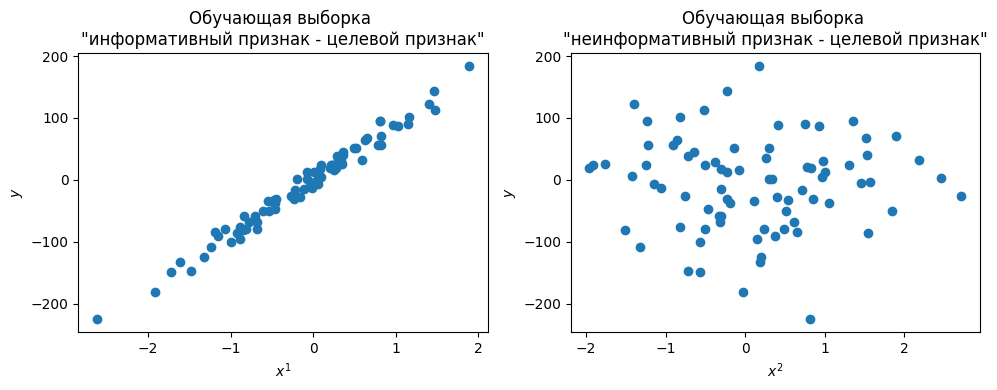

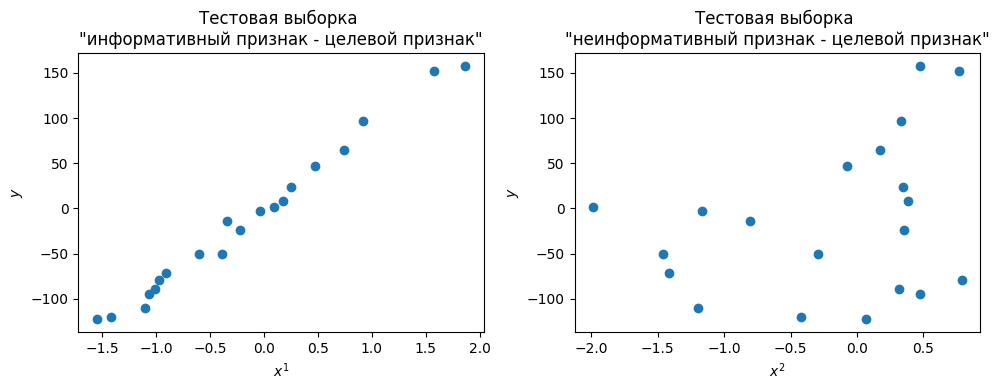

In [30]:
# Визуализация

# Обучающие данные
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
i = 0
for ax in axes:
    ax.scatter(X_train[:, i], y_train)
    ax.set_xlabel('$x^%s$' % (i+1))
    ax.set_ylabel('$y$')
    i += 1
axes[0].set_title('Обучающая выборка \n"информативный признак - целевой признак"')
axes[1].set_title('Обучающая выборка \n"неинформативный признак - целевой признак"')
fig.tight_layout()

# Тестовые данные
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
i = 0
for ax in axes:
    ax.scatter(X_test[:, i], y_test)
    ax.set_xlabel('$x^%s$' % (i+1))
    ax.set_ylabel('$y$')
    i += 1
axes[0].set_title('Тестовая выборка \n"информативный признак - целевой признак"')
axes[1].set_title('Тестовая выборка \n"неинформативный признак - целевой признак"')
fig.tight_layout()

Как видим, весь сгенерированный ранее набор (X, y) разбит на обучающие и тестовые данные в соотношении 80:20 (в соответствии с установленным значением параметра **test_size**).

Перед разбиением данные были перемешаны (по умолчанию **shuffle=True**).

Теперь можно использовать обучающий набор (X_train, y_train) для построения модели регрессии.

### Создание и обучение моделей линейной регрессии
Инструментарий для создания и обучения линейных моделей (как регрессии, так и классификации) реализован в модуле **linear_model** библиотеки Scikit-learn.

[Документация модуля](https://scikit-learn.org/stable/api/sklearn.linear_model.html)

[Описания моделей и примеры](https://scikit-learn.org/stable/modules/linear_model.html)

Работа с моделями реализована в многочисленных классах данного модуля. Разные классы предназначены для работы с моделями разных типов, а также отличаются своей функциональностью.

В данном курсе будут рассмотрены только наиболее простые инструменты.

Действия по построению моделей любых типов с помощью инструментария Scikit-learn выполняются по одной и той же схеме.
1.   Создание объекта-модели (экземпляра соответствующего класса с выбранными настройками).
2.   Обучение модели на обучающих данных - применение метода **fit()** к созданной в п. 1 модели с указанием данных, на которых должна обучаться модель. Значения весов признаков, вычисляемые в процессе обучения, сохраняются во внутренних переменных класса; по завершению обучения они доступны через атрибуты класса.
3.   Получение предсказаний модели (на обучающих и тестовых данных) - применение метода **predict()** к обученной ранее модели с указанием данных, для которых нужно рассчитать прогноз.



Класс **LinearRegression** предназначен для создания самых простых моделей линейной регрессии, поэтому он имеет совсем немного настроек. Обучение модели в этом классе может выполняться только на основе **MSE**.

[Документация класса](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

В классе имеются атрибуты **coef_** и **intercept_**, которые позволяют получить, соответственно, веса признаков и свободный коэффициент (bias), найденные по результатам обучения модели.

**!!!** Еще раз: свободный коэффициент хранится в отдельном атрибуте. Не следует об этом забывать.

Создадим простейшую модель линейной регрессии и обучим ее на сформированной ранее обучающей выборке (X_train, y_train).

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Создание объекта-модели (экземпляра класса с настройками по умолчанию)
model = LinearRegression()

In [33]:
# Обучение модели на обучающих данных
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Вывод весов признаков и bias, полученных по результатам обучения
print("Веса признаков ", model.coef_)
print("Bias ", model.intercept_)

Веса признаков  [89.17886345  0.60553327]
Bias  1.329661855895682


Таким образом, уравнение регрессии, полученное по результатам обучения, имеет вид $\quad a(x) = 1.330 + 89.179 \cdot x^1 + 0.606 \cdot x^2 \;.$

В процессе обучения модели участвовали оба признака: и информативный, и "шумовой" (оба были переданы методу fit() ). Как и следовало ожидать, неинформативный признак в результате обучения получил очень небольшой вес.

Визуализируем выборку вместе с линиями регрессии: сгенерированной изначально, и полученной по итогу обучения модели.

Для визуализации будем использовать только информативный признак.

In [35]:
# Создание диапазонов значений для каждого из признаков
x_1 = np.linspace(floor(np.min(X[:, 0])), ceil(np.max(X[:, 0])), 2).reshape(-1, 1)
x_2 = np.linspace(floor(np.min(X[:, 1])), ceil(np.max(X[:, 1])), 2).reshape(-1, 1)

# Получение границ области построения по двум признакам
x_lin = np.hstack((x_1, x_2))
x_lin

array([[-3., -2.],
       [ 2.,  3.]])

In [36]:
# Значения целевого признака в соответствии со сгенерированным уравнением
y_gen = np.dot(x_lin, coef)

# Получение прогнозов в области построения (достаточно только граничных точек, т. к. модель линейная)
y_mod = np.dot(x_lin, model.coef_) + model.intercept_

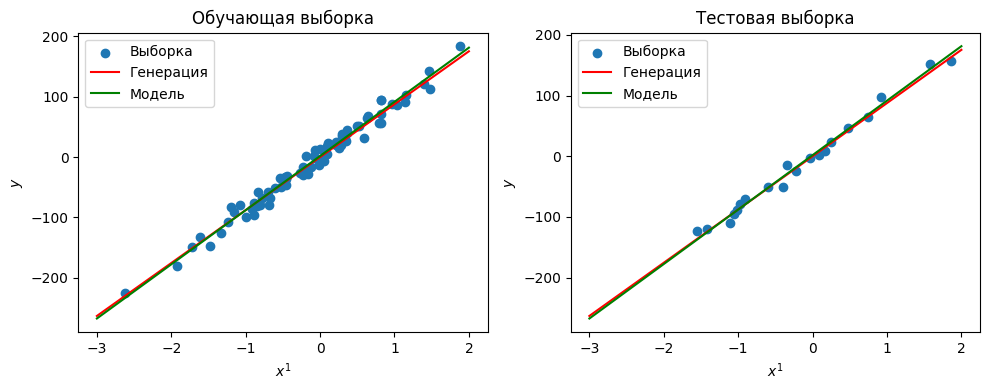

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# Вывод обучающих данных (используется только информативный признак)
axes[0].scatter(X_train[:, 0], y_train, label='Выборка')
axes[0].set_title('Обучающая выборка')

# Вывод тестовых данных (используется только информативный признак)
axes[1].scatter(X_test[:, 0], y_test, label='Выборка')
axes[1].set_title('Тестовая выборка')

# Вывод линий регрессии (сгенерированной и полученной при обучении модели) на обоих графиках
for ax in axes:
  ax.plot(x_lin[:, 0], y_gen, 'r', label='Генерация')
  ax.plot(x_lin[:, 0], y_mod, 'g', label='Модель')
  ax.set_xlabel('$x^1$')
  ax.set_ylabel('$y$')
  ax.legend(loc=2)

fig.tight_layout()

По визуальной оценке, модель неплохо описывает тенденцию как на обучающей, так и на тестовой выборке.

Но для точной оценки качества прогноза нужно иметь количественные значения.

### Оценка качества моделей
На данном этапе мы рассмотрели только одну метрику качества модели регрессии - среднеквадратичную ошибку (MSE).

Существуют и другие метрики, которые будут рассмотрены на следующих занятиях.

Чтобы не писать код для вычисления функционалов ошибки, в модуле **metrics** библиотеки Scikit-learn уже реализованы встроенные функции для получения различных метрик качества моделей.

[Документация модуля](https://scikit-learn.org/stable/api/sklearn.metrics.html)

Вычисление среднеквадратичной ошибки (MSE) реализовано в функции **mean_squared_error()** модуля **metrics**.

На вход функции нужно подать массив правильных ответов и массив предсказаний модели.

[Документация функции](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

Рассчитаем значения MSE обученной нами модели отдельно на обучающих и тестовых данных.

In [38]:
from sklearn.metrics import mean_squared_error as mse

In [39]:
# Получение предсказаний модели на обучающих данных
y_pred_train = model.predict(X_train)
y_pred_train[:10]

array([ -40.20899214,   31.46208321,   54.99130425, -231.79853975,
         30.90557091, -141.91206408,  -21.01018376,  125.5803967 ,
        -18.16614431,  -51.20823389])

In [40]:
# Вычисление MSE на обучающей выборке
mse_train = mse(y_train, y_pred_train)
mse_train

108.71196229422758

In [41]:
# Получение предсказаний модели на тестовых данных
y_pred_test = model.predict(X_test)
y_pred_test[:10]

array([  -2.47356775,  -93.1186    ,  -85.11473581,  -80.50209007,
         83.16325205,    8.30924451,  142.62677316,   43.48835503,
        -98.05637664, -125.14620703])

In [42]:
# Вычисление MSE на тестовой выборке
mse_test = mse(y_test, y_pred_test)
mse_test

79.37272724899346

Качество предсказаний на тестовой выборке не ухудшилось (по сравнению с обучающей), что свидетельствует о хорошей обощающей способности полученной модели.

*Замечание*. Тот факт, что значение MSE на тестовой выборке в данном примере заметно меньше, чем на обучающей, можно объяснить небольшим разбросом значений тестовой выборки (очень маленькой в этом учебном примере). В реальных задачах при хорошем качестве модели ошибка на тестовой выборке обычно сопоставима или немного превосходит ошибку на обучающих данных.